DATA 620 - Web Analytics
Week 2 Project 1

## Team Info

+ Brian Liles
+ Rajwant Mishra
+ Md. Jalal Uddin
+ Sarah Wigodsky

<b> Youtube Project link: </b> [Project Explanation](https://youtu.be/5mLBa5INXBQ) 

<b> Gephi Project Explanation link: </b>[Gephi Explanation](https://youtu.be/hyUQbBOo4kw)

Identify and load a network dataset that has some categorical information available for each node.
For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
Compare your centrality measures across your categorical groups.

A data set of political blogs available from the website http://www-personal.umich.edu/~mejn/netdata/ will be used to explore social networks.  The data set was compiled in 2005 by Lada Adamic and Natalie Glance and shared in Proceedings of the WWW-2005 Workshop on the Weblogging Ecosystem (2005).  The blog posts are from the time of the 2004 presidential election.  The nodes in the data set have attributes to designate bloggers as being <br>
+ liberal (0) or 
+ conservative (1).  <br>

The data set is stored in a gml file.  The file lists nodes and edges for each blogger.  The source of the blog, website, and political leaning of the blogger is included.  

We will explore how centrality measures of differ for conservative and liberal bloggers.  In addition we will identify connections between centrality measures, the prevelance of conservative bloggers and George W. Bush's win in the 2004 presidential election.

In [2]:
#import libraries
import networkx as nx
import matplotlib.pyplot as plot
import pandas as pd

In [3]:
#Before loading the data, a line identifying the data as a multigraph is added to the file
#load data
pol_blogs = nx.read_gml('polblogs.gml')

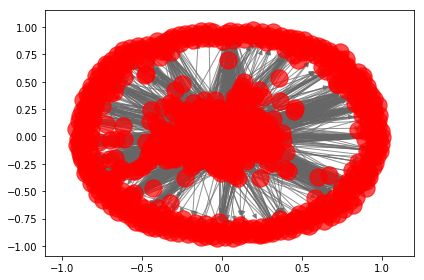

In [4]:
# Draw the graph adding alpha, removing labels, and softening edge color
nx.draw_networkx(pol_blogs,  alpha=0.7, with_labels=False, edge_color='.4')
plot.tight_layout();

The graph above shows a cluster of bloggers who are connected to many other bloggers, represented by the overlapping circles in the center.  In addition, there are many bloggers who are located on the periphery of the social network . 

Full Network Considering Poltical Leanings <br> Legend
+ Liberal bloggers - > Pink 
+ Conservative bloggers - > Green
<img src="Gep/FullNetworkWithValue.png" width="600">

The social network graph above gives insight into how political bloggers, considering their political viewpoints, were connected in 2004.  There is a dense network of connections between bloggers shown in the center of the graph.  However the connections between bloggers are primarily between those of the same political opinions.  

In [4]:
#number of nodes
num_nodes = pol_blogs.number_of_nodes()
print ('The number of nodes: ' + str(num_nodes))

The number of nodes: 1490


In [5]:
#number of edges
num_edges = pol_blogs.number_of_edges()
print ('The number of edges: ' + str(num_edges))

The number of edges: 19090


### Degree Centrality
Degree centrality measures the number of bloggers each blogger is connected to.  

In [6]:
# Function to Calcuate Degree of each node
def calcualte_degree(G,n = 0):
    fmdegree = []
    fmNode = []
    for node in G.nodes():
        tempD = G.degree(node)
        if tempD >= n : fmdegree.append(tempD),fmNode.append(node)
            
    return fmdegree,fmNode

gpdDegree , gpdNode = calcualte_degree(pol_blogs,0)

In [34]:
# bloggers with the highest degree centrality
data = {'Node': gpdNode, 
        'Degree': gpdDegree}

df_NodeDegree = pd.DataFrame( data)
df_NodeDegree.head()

top_10 = df_NodeDegree.sort_values(by=['Degree'],ascending= False)
df_NodeDegree.sort_values(by=['Degree'],ascending= False).head(10)

,Node,Degree
854,blogsforbush.com,468
154,dailykos.com,384
1050,instapundit.com,363
54,atrios.blogspot.com,351
640,talkingpointsmemo.com,283
728,washingtonmonthly.com,256
962,drudgereport.com,245
1244,powerlineblog.com,236
1152,michellemalkin.com,229
1040,hughhewitt.com,225


The data table above displays the ten bloggers with the highest degree centrality.  The blogger connected to the most other bloggers is blogsforbush, who is connected to 468 other bloggers.

In [8]:
#relative degree centrality
deg_centrality = nx.degree_centrality(pol_blogs)
deg_centrality
sorted_x = sorted(deg_centrality.items(), key=lambda kv: kv[1],reverse=True)
sorted_x[0:10]

[('blogsforbush.com', 0.3143049026192075),
 ('dailykos.com', 0.25789120214909333),
 ('instapundit.com', 0.24378777703156482),
 ('atrios.blogspot.com', 0.23572867696440566),
 ('talkingpointsmemo.com', 0.1900604432505037),
 ('washingtonmonthly.com', 0.17192746809939558),
 ('drudgereport.com', 0.16453995970449967),
 ('powerlineblog.com', 0.1584956346541303),
 ('michellemalkin.com', 0.15379449294828745),
 ('hughhewitt.com', 0.1511081262592344)]

The list above displays the relative degree centrality of the bloggers with the highest degree centrality.  Relative degree centrality shows the fraction of the nodes each blogger has a connection to.  For example, blogsforbush.com has the most connections, and that blogger is connected to approximately 31% of the other bloggers.  dailykos, the blogger with the next highest number of connections, is connected to about 26% of the bloggers.  

In [9]:
# create weighted graph from pol_blogs
#the function eigenvector_centrality cannot be run on a Multigraph so the graph object needs to be converted to a weighted graph
G = nx.DiGraph()
for u,v,data in pol_blogs.edges(data=True):
    w = data['weight'] if 'weight' in data else 1.0
    if G.has_edge(u,v):
        G[u][v]['weight'] += w
    else:
        G.add_edge(u, v, weight=w)

### Eigenvector Centrality
Eigenvector centrality measures the significance of a blogger on the network of bloggers. This takes into account the number of connections each blogger has and whether the connections are to other bloggers who have many connections.

In [10]:
#eigenvector centrality
eigen_centrality = nx.eigenvector_centrality(G)
sorted_eigen = sorted(eigen_centrality.items(), key=lambda kv: kv[1],reverse=True)
sorted_eigen[0:10]

[('atrios.blogspot.com', 0.23426316870535532),
 ('dailykos.com', 0.21639996016909102),
 ('talkingpointsmemo.com', 0.21034589746633003),
 ('washingtonmonthly.com', 0.18774454846145786),
 ('talkleft.com', 0.1616204490388653),
 ('prospect.org/weblog', 0.15654010072323918),
 ('juancole.com', 0.15579625690594343),
 ('digbysblog.blogspot.com', 0.15100642454864657),
 ('pandagon.net', 0.14606876456231546),
 ('yglesias.typepad.com/matthew', 0.1433334771332992)]

Bloggers with the highest eigenvector centralities are shown above.  Bloggers with the highest degree centralities do not necessarily also have the highest eigenvector centralities. The following bloggers are amongst the top 10 most significant bloggers as designated by the eigenvector centrality and have the most connections as shown by degree centrality:
+ dailykos
+ instapundit
+ atrios.blogspot
+ talkingpointsmemo 
+ washingtonmonthly

### Get Data divided in Two Set by value 

In [11]:
# Get Nodes from Main netwrong Graph , where Node Value = 1 
node_value1 = [v for v in pol_blogs  if nx.get_node_attributes(pol_blogs, 'value')[v] ==1]
node_value0 = [v for v in pol_blogs  if nx.get_node_attributes(pol_blogs, 'value')[v] ==0]

In [12]:
print("There are " + str(len(node_value0)) + " liberal bloggers.")
print("There are " + str(len(node_value1)) + " conservative bloggers.")

There are 758 liberal bloggers.
There are 732 conservative bloggers.


In [13]:
# For Node Attribute Code
# creating Edgelist by Node Attribute 
# here we are creating the edgelist for each node v by taking its Edge (e) 
# only for the node which has attribute of 0 and 1 as per the varaible 
all_edge_list = [(v,e) for v in pol_blogs for e in pol_blogs[v] ]

all_edge_list_val0 = [(v,e) for v in pol_blogs for e in pol_blogs[v] if nx.get_node_attributes(pol_blogs, 'value')[v] ==0]
all_edge_list_val1 = [(v,e) for v in pol_blogs for e in pol_blogs[v] if nx.get_node_attributes(pol_blogs, 'value')[v] ==1]
#len(all_edge_list) , len( all_edge_list_val0) , len( all_edge_list_val1) 

In [14]:
print("Liberal bloggers have " + str(len( all_edge_list_val0)) + " connections to other bloggers.")
print("Conservative bloggers have " + str(len( all_edge_list_val1)) + " connections to other bloggers.")

Liberal bloggers have 9168 connections to other bloggers.
Conservative bloggers have 9857 connections to other bloggers.


Even though there are more liberal bloggers, conservative bloggers have more reach, as they have more connections to other bloggers.

In [15]:
# working for Node value = 1 
G_V1 = nx.MultiDiGraph()

In [16]:
node_ege1 = [v for v in pol_blogs.edges]

G_V1 = G_V1.add_edges_from(node_ege1)

Let's use pandas to find out which convert data in data frame 

In [17]:
node_value0= [(v,pol_blogs.node[v]['value'])  for v in pol_blogs]

In [18]:
all_edge = [e for e in pol_blogs.edges]

In [19]:

# Using direction of the edge .. Not NODE Value attribute
df_All = pd.DataFrame(all_edge, columns=['Node1', 'Node2', 'Attr'])

df_value1 = df_All[df_All.Attr==1]

df_value0 = df_All[df_All.Attr==0]


### Betweenness Centrality between 1 to 50 
Betweenness centrality is a measure of the number of shortest paths that pass through that node.  
+ Liberal bloggers - Pink 
+ Conservative bloggers - Green
<img src="Gep/Betweennessbetween1to50.png" width="500">
The graph above displays the betweenness centrality for bloggers.  The larger the betweenness centrality, the larger the node is displayed.  The largest node is the Conservative blogger blogsforbush. 

In [20]:
# Creating Graph1 for df_value1 Its by Direction 

G_df1 = nx.from_pandas_edgelist(df_value1, 'Node1', 'Node2', edge_attr='Attr')
#G_df1.edges(data=True)

# Creating Graph2 for df_value1

G_df0 = nx.from_pandas_edgelist(df_value0, 'Node1', 'Node2', edge_attr='Attr')
#G_df0.edges(data=True)

### ### Using the Above Genrated Edgelist to convert to dataframe so that we can pass it to Nx
df1_v1 = pd.DataFrame(all_edge_list_val1, columns=['Node1', 'Node2'])

df1_v0 = pd.DataFrame(all_edge_list_val0, columns=['Node1', 'Node2'])
#df_All.head(),df1_v1.head() ,df1_v0.head()

G1_df1 = nx.from_pandas_edgelist(df1_v1, 'Node1', 'Node2')
#G1_df1.edges(data=True)

G1_df0 = nx.from_pandas_edgelist(df1_v0, 'Node1', 'Node2')
#G1_df0.edges(data=True)

In [24]:
# start Here for NODE Valuie 
#relative degree centrality for Value = 0
deg_centrality = nx.degree_centrality(G1_df0)
deg_centrality
sorted_x = sorted(deg_centrality.items(), key=lambda kv: kv[1],reverse=True)
sorted_x[0:10]

Zeroresult = pd.DataFrame(sorted_x,columns=['Liberal_Bloggers','Degree'])
Zeroresult.head()


,Liberal_Bloggers,Degree
0,dailykos.com,0.417808
1,atrios.blogspot.com,0.349315
2,talkingpointsmemo.com,0.321918
3,washingtonmonthly.com,0.258904
4,liberaloasis.com,0.231507


In [25]:
#relative degree centrality for Value = 1
deg_centrality = nx.degree_centrality(G1_df1)
deg_centrality
sorted_x = sorted(deg_centrality.items(), key=lambda kv: kv[1],reverse=True)
sorted_x[0:10]
Oneresult = pd.DataFrame(sorted_x,columns=['Conservative_Bloggers','Degree'])
Oneresult.head()


,Conservative_Bloggers,Degree
0,blogsforbush.com,0.367574
1,instapundit.com,0.341584
2,drudgereport.com,0.262376
3,michellemalkin.com,0.248762
4,powerlineblog.com,0.243812


In [44]:
top_10.head(10)

,Node,Degree
854,blogsforbush.com,468
154,dailykos.com,384
1050,instapundit.com,363
54,atrios.blogspot.com,351
640,talkingpointsmemo.com,283
728,washingtonmonthly.com,256
962,drudgereport.com,245
1244,powerlineblog.com,236
1152,michellemalkin.com,229
1040,hughhewitt.com,225


In [46]:
# By Degree ,
# Please note that our Full graph was directed graph , where as the other two graphs are are not directed 
# and only studied based on the degree  
pd.DataFrame({'Conservative Bloggers': Oneresult.Conservative_Bloggers, 'Liberal Bloggers': Zeroresult.Liberal_Bloggers}).head(10)

,Conservative Bloggers,Liberal Bloggers
0,blogsforbush.com,dailykos.com
1,instapundit.com,atrios.blogspot.com
2,drudgereport.com,talkingpointsmemo.com
3,michellemalkin.com,washingtonmonthly.com
4,powerlineblog.com,liberaloasis.com
5,littlegreenfootballs.com/weblog,juancole.com
6,hughhewitt.com,newleftblogs.blogspot.com
7,lashawnbarber.com,digbysblog.blogspot.com
8,wizbangblog.com,pandagon.net
9,truthlaidbear.com,madkane.com/notable.html


Of the bloggers with the top 10 degree centralities, 6 are conservative and 4 are liberal.

### Blogger Network for Degree Centrality greater than 200
<img src="Gep/DegreeMorethan200.png" width="700">
More than twice as many of the bloggers with more than 200 connections are conservative.

### Eigenvector Centrality for bloggers with Degree Centrality greater than 200
<img src="Gep/EVD200MO.png" width="700">
The eigenvector centrality calculated through Gephi considered the network to be a directed network.
Liberal bloggers have higher eigenvector centrality than the conservative bloggers.  
The eigenvector centrality measures calculated through Gephi do not match the values previously calculated in Python.  Inspite of this, the order of the eigenvector centrality measures from greatest to least is the same in both calculations.

## Conclusion

The conservative bloggers are connected to more bloggers than liberal bloggers.  The blogger blogsforbush has a significantly higher betweenness centrality than any other blogger.  The farther reach of the conservative bloggers likely contributed to George W. Bush's win in 2004.